 # 1.Import and Install Dependencies

In [1]:
!pip install tensorflow==2.18.0 opencv-python mediapipe scikit-learn matplotlib


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities
mp_face_mesh = mp.solutions.face_mesh

In [4]:

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:

draw_landmarks(frame, results)


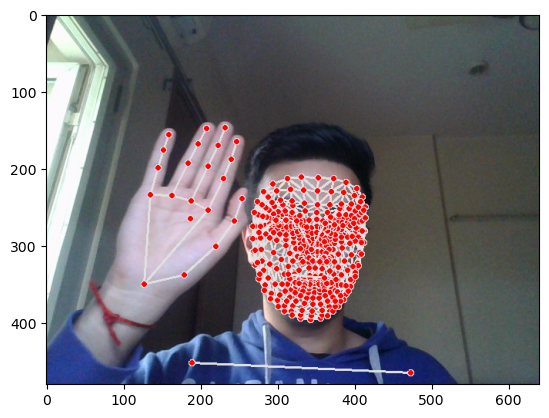

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [10]:
len(results.pose_landmarks.landmark)

33

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
len(pose)

33

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 0.53762043,  0.63598818, -1.12611568, ...,  0.24946286,
        0.32571489, -0.00905002])

In [17]:
np.save('0', result_test)

In [18]:
np.load('0.npy')

array([ 0.53762043,  0.63598818, -1.12611568, ...,  0.24946286,
        0.32571489, -0.00905002])


# 4. Setup Folders for Collection

In [19]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello','indian','sign','language','bye','again','me','you','man','woman','deaf','hearing','teacher','thankyou','welcome'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

start_folder = 1

In [20]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [21]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder + no_sequences):
            # Create the sequence folder if it doesn't exist
            sequence_path = os.path.join(DATA_PATH, action, str(sequence))
            os.makedirs(sequence_path, exist_ok=True)
            
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):
                # Path for the current frame
                npy_path = os.path.join(sequence_path, f"{frame_num}.npy")
                
                # Skip if the file already exists
                if os.path.exists(npy_path):
                    print(f"Data for {action} Sequence {sequence} Frame {frame_num} already exists. Skipping...")
                    continue

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()


Data for hello Sequence 1 Frame 0 already exists. Skipping...
Data for hello Sequence 1 Frame 1 already exists. Skipping...
Data for hello Sequence 1 Frame 2 already exists. Skipping...
Data for hello Sequence 1 Frame 3 already exists. Skipping...
Data for hello Sequence 1 Frame 4 already exists. Skipping...
Data for hello Sequence 1 Frame 5 already exists. Skipping...
Data for hello Sequence 1 Frame 6 already exists. Skipping...
Data for hello Sequence 1 Frame 7 already exists. Skipping...
Data for hello Sequence 1 Frame 8 already exists. Skipping...
Data for hello Sequence 1 Frame 9 already exists. Skipping...
Data for hello Sequence 1 Frame 10 already exists. Skipping...
Data for hello Sequence 1 Frame 11 already exists. Skipping...
Data for hello Sequence 1 Frame 12 already exists. Skipping...
Data for hello Sequence 1 Frame 13 already exists. Skipping...
Data for hello Sequence 1 Frame 14 already exists. Skipping...
Data for hello Sequence 1 Frame 15 already exists. Skipping...
Da

Data for indian Sequence 9 Frame 6 already exists. Skipping...
Data for indian Sequence 9 Frame 7 already exists. Skipping...
Data for indian Sequence 9 Frame 8 already exists. Skipping...
Data for indian Sequence 9 Frame 9 already exists. Skipping...
Data for indian Sequence 9 Frame 10 already exists. Skipping...
Data for indian Sequence 9 Frame 11 already exists. Skipping...
Data for indian Sequence 9 Frame 12 already exists. Skipping...
Data for indian Sequence 9 Frame 13 already exists. Skipping...
Data for indian Sequence 9 Frame 14 already exists. Skipping...
Data for indian Sequence 9 Frame 15 already exists. Skipping...
Data for indian Sequence 9 Frame 16 already exists. Skipping...
Data for indian Sequence 9 Frame 17 already exists. Skipping...
Data for indian Sequence 9 Frame 18 already exists. Skipping...
Data for indian Sequence 9 Frame 19 already exists. Skipping...
Data for indian Sequence 9 Frame 20 already exists. Skipping...
Data for indian Sequence 9 Frame 21 already 

Data for sign Sequence 5 Frame 15 already exists. Skipping...
Data for sign Sequence 5 Frame 16 already exists. Skipping...
Data for sign Sequence 5 Frame 17 already exists. Skipping...
Data for sign Sequence 5 Frame 18 already exists. Skipping...
Data for sign Sequence 5 Frame 19 already exists. Skipping...
Data for sign Sequence 5 Frame 20 already exists. Skipping...
Data for sign Sequence 5 Frame 21 already exists. Skipping...
Data for sign Sequence 5 Frame 22 already exists. Skipping...
Data for sign Sequence 5 Frame 23 already exists. Skipping...
Data for sign Sequence 5 Frame 24 already exists. Skipping...
Data for sign Sequence 5 Frame 25 already exists. Skipping...
Data for sign Sequence 5 Frame 26 already exists. Skipping...
Data for sign Sequence 5 Frame 27 already exists. Skipping...
Data for sign Sequence 5 Frame 28 already exists. Skipping...
Data for sign Sequence 5 Frame 29 already exists. Skipping...
Data for sign Sequence 6 Frame 0 already exists. Skipping...
Data for 

Data for language Sequence 7 Frame 11 already exists. Skipping...
Data for language Sequence 7 Frame 12 already exists. Skipping...
Data for language Sequence 7 Frame 13 already exists. Skipping...
Data for language Sequence 7 Frame 14 already exists. Skipping...
Data for language Sequence 7 Frame 15 already exists. Skipping...
Data for language Sequence 7 Frame 16 already exists. Skipping...
Data for language Sequence 7 Frame 17 already exists. Skipping...
Data for language Sequence 7 Frame 18 already exists. Skipping...
Data for language Sequence 7 Frame 19 already exists. Skipping...
Data for language Sequence 7 Frame 20 already exists. Skipping...
Data for language Sequence 7 Frame 21 already exists. Skipping...
Data for language Sequence 7 Frame 22 already exists. Skipping...
Data for language Sequence 7 Frame 23 already exists. Skipping...
Data for language Sequence 7 Frame 24 already exists. Skipping...
Data for language Sequence 7 Frame 25 already exists. Skipping...
Data for l

Data for bye Sequence 12 Frame 10 already exists. Skipping...
Data for bye Sequence 12 Frame 11 already exists. Skipping...
Data for bye Sequence 12 Frame 12 already exists. Skipping...
Data for bye Sequence 12 Frame 13 already exists. Skipping...
Data for bye Sequence 12 Frame 14 already exists. Skipping...
Data for bye Sequence 12 Frame 15 already exists. Skipping...
Data for bye Sequence 12 Frame 16 already exists. Skipping...
Data for bye Sequence 12 Frame 17 already exists. Skipping...
Data for bye Sequence 12 Frame 18 already exists. Skipping...
Data for bye Sequence 12 Frame 19 already exists. Skipping...
Data for bye Sequence 12 Frame 20 already exists. Skipping...
Data for bye Sequence 12 Frame 21 already exists. Skipping...
Data for bye Sequence 12 Frame 22 already exists. Skipping...
Data for bye Sequence 12 Frame 23 already exists. Skipping...
Data for bye Sequence 12 Frame 24 already exists. Skipping...
Data for bye Sequence 12 Frame 25 already exists. Skipping...
Data for

Data for again Sequence 13 Frame 20 already exists. Skipping...
Data for again Sequence 13 Frame 21 already exists. Skipping...
Data for again Sequence 13 Frame 22 already exists. Skipping...
Data for again Sequence 13 Frame 23 already exists. Skipping...
Data for again Sequence 13 Frame 24 already exists. Skipping...
Data for again Sequence 13 Frame 25 already exists. Skipping...
Data for again Sequence 13 Frame 26 already exists. Skipping...
Data for again Sequence 13 Frame 27 already exists. Skipping...
Data for again Sequence 13 Frame 28 already exists. Skipping...
Data for again Sequence 13 Frame 29 already exists. Skipping...
Data for again Sequence 14 Frame 0 already exists. Skipping...
Data for again Sequence 14 Frame 1 already exists. Skipping...
Data for again Sequence 14 Frame 2 already exists. Skipping...
Data for again Sequence 14 Frame 3 already exists. Skipping...
Data for again Sequence 14 Frame 4 already exists. Skipping...
Data for again Sequence 14 Frame 5 already ex

Data for me Sequence 19 Frame 10 already exists. Skipping...
Data for me Sequence 19 Frame 11 already exists. Skipping...
Data for me Sequence 19 Frame 12 already exists. Skipping...
Data for me Sequence 19 Frame 13 already exists. Skipping...
Data for me Sequence 19 Frame 14 already exists. Skipping...
Data for me Sequence 19 Frame 15 already exists. Skipping...
Data for me Sequence 19 Frame 16 already exists. Skipping...
Data for me Sequence 19 Frame 17 already exists. Skipping...
Data for me Sequence 19 Frame 18 already exists. Skipping...
Data for me Sequence 19 Frame 19 already exists. Skipping...
Data for me Sequence 19 Frame 20 already exists. Skipping...
Data for me Sequence 19 Frame 21 already exists. Skipping...
Data for me Sequence 19 Frame 22 already exists. Skipping...
Data for me Sequence 19 Frame 23 already exists. Skipping...
Data for me Sequence 19 Frame 24 already exists. Skipping...
Data for me Sequence 19 Frame 25 already exists. Skipping...
Data for me Sequence 19 

Data for you Sequence 20 Frame 0 already exists. Skipping...
Data for you Sequence 20 Frame 1 already exists. Skipping...
Data for you Sequence 20 Frame 2 already exists. Skipping...
Data for you Sequence 20 Frame 3 already exists. Skipping...
Data for you Sequence 20 Frame 4 already exists. Skipping...
Data for you Sequence 20 Frame 5 already exists. Skipping...
Data for you Sequence 20 Frame 6 already exists. Skipping...
Data for you Sequence 20 Frame 7 already exists. Skipping...
Data for you Sequence 20 Frame 8 already exists. Skipping...
Data for you Sequence 20 Frame 9 already exists. Skipping...
Data for you Sequence 20 Frame 10 already exists. Skipping...
Data for you Sequence 20 Frame 11 already exists. Skipping...
Data for you Sequence 20 Frame 12 already exists. Skipping...
Data for you Sequence 20 Frame 13 already exists. Skipping...
Data for you Sequence 20 Frame 14 already exists. Skipping...
Data for you Sequence 20 Frame 15 already exists. Skipping...
Data for you Seque

Data for man Sequence 27 Frame 12 already exists. Skipping...
Data for man Sequence 27 Frame 13 already exists. Skipping...
Data for man Sequence 27 Frame 14 already exists. Skipping...
Data for man Sequence 27 Frame 15 already exists. Skipping...
Data for man Sequence 27 Frame 16 already exists. Skipping...
Data for man Sequence 27 Frame 17 already exists. Skipping...
Data for man Sequence 27 Frame 18 already exists. Skipping...
Data for man Sequence 27 Frame 19 already exists. Skipping...
Data for man Sequence 27 Frame 20 already exists. Skipping...
Data for man Sequence 27 Frame 21 already exists. Skipping...
Data for man Sequence 27 Frame 22 already exists. Skipping...
Data for man Sequence 27 Frame 23 already exists. Skipping...
Data for man Sequence 27 Frame 24 already exists. Skipping...
Data for man Sequence 27 Frame 25 already exists. Skipping...
Data for man Sequence 27 Frame 26 already exists. Skipping...
Data for man Sequence 27 Frame 27 already exists. Skipping...
Data for

Data for deaf Sequence 3 Frame 23 already exists. Skipping...
Data for deaf Sequence 3 Frame 24 already exists. Skipping...
Data for deaf Sequence 3 Frame 25 already exists. Skipping...
Data for deaf Sequence 3 Frame 26 already exists. Skipping...
Data for deaf Sequence 3 Frame 27 already exists. Skipping...
Data for deaf Sequence 3 Frame 28 already exists. Skipping...
Data for deaf Sequence 3 Frame 29 already exists. Skipping...
Data for deaf Sequence 4 Frame 0 already exists. Skipping...
Data for deaf Sequence 4 Frame 1 already exists. Skipping...
Data for deaf Sequence 4 Frame 2 already exists. Skipping...
Data for deaf Sequence 4 Frame 3 already exists. Skipping...
Data for deaf Sequence 4 Frame 4 already exists. Skipping...
Data for deaf Sequence 4 Frame 5 already exists. Skipping...
Data for deaf Sequence 4 Frame 6 already exists. Skipping...
Data for deaf Sequence 4 Frame 7 already exists. Skipping...
Data for deaf Sequence 4 Frame 8 already exists. Skipping...
Data for deaf Seq

Data for hearing Sequence 16 Frame 23 already exists. Skipping...
Data for hearing Sequence 16 Frame 24 already exists. Skipping...
Data for hearing Sequence 16 Frame 25 already exists. Skipping...
Data for hearing Sequence 16 Frame 26 already exists. Skipping...
Data for hearing Sequence 16 Frame 27 already exists. Skipping...
Data for hearing Sequence 16 Frame 28 already exists. Skipping...
Data for hearing Sequence 16 Frame 29 already exists. Skipping...
Data for hearing Sequence 17 Frame 0 already exists. Skipping...
Data for hearing Sequence 17 Frame 1 already exists. Skipping...
Data for hearing Sequence 17 Frame 2 already exists. Skipping...
Data for hearing Sequence 17 Frame 3 already exists. Skipping...
Data for hearing Sequence 17 Frame 4 already exists. Skipping...
Data for hearing Sequence 17 Frame 5 already exists. Skipping...
Data for hearing Sequence 17 Frame 6 already exists. Skipping...
Data for hearing Sequence 17 Frame 7 already exists. Skipping...
Data for hearing S

Data for teacher Sequence 26 Frame 24 already exists. Skipping...
Data for teacher Sequence 26 Frame 25 already exists. Skipping...
Data for teacher Sequence 26 Frame 26 already exists. Skipping...
Data for teacher Sequence 26 Frame 27 already exists. Skipping...
Data for teacher Sequence 26 Frame 28 already exists. Skipping...
Data for teacher Sequence 26 Frame 29 already exists. Skipping...
Data for teacher Sequence 27 Frame 0 already exists. Skipping...
Data for teacher Sequence 27 Frame 1 already exists. Skipping...
Data for teacher Sequence 27 Frame 2 already exists. Skipping...
Data for teacher Sequence 27 Frame 3 already exists. Skipping...
Data for teacher Sequence 27 Frame 4 already exists. Skipping...
Data for teacher Sequence 27 Frame 5 already exists. Skipping...
Data for teacher Sequence 27 Frame 6 already exists. Skipping...
Data for teacher Sequence 27 Frame 7 already exists. Skipping...
Data for teacher Sequence 27 Frame 8 already exists. Skipping...
Data for teacher Se

Data for welcome Sequence 9 Frame 10 already exists. Skipping...
Data for welcome Sequence 9 Frame 11 already exists. Skipping...
Data for welcome Sequence 9 Frame 12 already exists. Skipping...
Data for welcome Sequence 9 Frame 13 already exists. Skipping...
Data for welcome Sequence 9 Frame 14 already exists. Skipping...
Data for welcome Sequence 9 Frame 15 already exists. Skipping...
Data for welcome Sequence 9 Frame 16 already exists. Skipping...
Data for welcome Sequence 9 Frame 17 already exists. Skipping...
Data for welcome Sequence 9 Frame 18 already exists. Skipping...
Data for welcome Sequence 9 Frame 19 already exists. Skipping...
Data for welcome Sequence 9 Frame 20 already exists. Skipping...
Data for welcome Sequence 9 Frame 21 already exists. Skipping...
Data for welcome Sequence 9 Frame 22 already exists. Skipping...
Data for welcome Sequence 9 Frame 23 already exists. Skipping...
Data for welcome Sequence 9 Frame 24 already exists. Skipping...
Data for welcome Sequence

# 6. Preprocessing Data and Create Labels and Features

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [23]:
label_map = {label:num for num, label in enumerate(actions)}

In [24]:
label_map

{'hello': 0,
 'indian': 1,
 'sign': 2,
 'language': 3,
 'bye': 4,
 'again': 5,
 'me': 6,
 'you': 7,
 'man': 8,
 'woman': 9,
 'deaf': 10,
 'hearing': 11,
 'teacher': 12,
 'thankyou': 13,
 'welcome': 14}

In [25]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [26]:
np.array(sequences).shape

(450, 30, 1662)

In [27]:
sequences

[[array([ 0.56374949,  0.41184425, -0.80378819, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.5624491 ,  0.41085854, -1.19301128, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.5613507 ,  0.41085356, -1.17482066, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.56088537,  0.41030324, -1.13564205, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.55836505,  0.41017932, -1.15333235, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.55784762,  0.41032755, -1.12625313, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.55750656,  0.41033775, -1.08880544, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.55406529,  0.4102194 , -1.08480728, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.5505414 ,  0.40986788, -1.08069682, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.55004084,  0.40985399, -1.03821409, ...,  0.        ,
       

In [28]:
np.array(labels).shape

(450,)

In [29]:
X = np.array(sequences)


In [30]:
X.shape

(450, 30, 1662)

In [31]:
y = to_categorical(labels).astype(int)

In [32]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((427, 30, 1662), (23, 30, 1662), (427, 15), (23, 15))

# 7. LSTM+GRU Neural Network

In [35]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    BatchNormalization,
    Input, 
    Conv1D, 
    MaxPooling1D, 
    LSTM, 
    Dense, 
    Dropout, 
    Bidirectional, 
    GRU,
    LayerNormalization,
    MultiHeadAttention,
    GlobalAveragePooling1D,
    BatchNormalization
)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import TensorBoard

In [36]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [37]:
model = Sequential()

# Define input separately
model.add(Input(shape=(30, 1662)))  # Input shape for the time steps and features

# Convolutional and pooling layers
model.add(Conv1D(64, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(2))

# Bidirectional GRU layers with Dropout
model.add(Bidirectional(GRU(128, return_sequences=True, activation='tanh')))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(64, return_sequences=False, activation='tanh')))
model.add(Dropout(0.5))

# Dense layers with Dropout and Regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))

# Output layer
model.add(Dense(actions.shape[0], activation='softmax'))

In [ ]:
actions.shape[0]

In [38]:
model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

In [41]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 28, 64)         │       319,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 14, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 14, 256)        │       148,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │       123,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │           495 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 602,895 (2.30 MB)

 Trainable params: 602,767 (2.30 MB)

 Non-trainable params: 128 (512.00 B)

### Make Predictions

In [ ]:
res = model.predict(X_test)

In [ ]:
actions[np.argmax(res[1])]

In [ ]:
actions[np.argmax(y_test[1])]

### Save Weights

In [ ]:
model.save('action.h5')

In [ ]:
# del model

In [39]:
model.load_weights('action.h5')

### Evaluation using Confusion Matrix and Accuracy

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, classification_report
from collections import Counter

In [ ]:
yhat = model.predict(X_test)

In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
ytrue

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)


In [ ]:
accuracy_score(ytrue, yhat)

In [ ]:
print(Counter(yhat))

In [ ]:
cm = confusion_matrix(ytrue, yhat)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
print(classification_report(ytrue, yhat))


# 8. TranserLearning model

In [ ]:
# # Define the transformer block
# def transformer_block(inputs, head_size, num_heads, ff_dim, dropout=0):
#     # Normalization and Attention
#     x = LayerNormalization(epsilon=1e-6)(inputs)
#     x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
#     x = Dropout(dropout)(x)
    
#     res = x + inputs  # Residual connection
    
#     # Feed Forward Part
#     x = LayerNormalization(epsilon=1e-6)(res)
#     x = Dense(ff_dim, activation="relu")(x)  # Output shape will be (None, 30, ff_dim)
#     x = Dropout(dropout)(x)
    
#     # Add a linear layer to match the original input shape
#     x = Dense(inputs.shape[-1])(x)  # Match the output shape to (None, 30, 1662)
    
#     return x + res  # Residual connection

# # Define the model
# def create_transformer_model(input_shape, num_classes, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0):
#     inputs = Input(shape=input_shape)
#     x = inputs

#     # Create transformer blocks
#     for _ in range(num_transformer_blocks):
#         x = transformer_block(x, head_size, num_heads, ff_dim, dropout)

#     # Pooling and MLP
#     x = GlobalAveragePooling1D(data_format="channels_first")(x)
#     for dim in mlp_units:
#         x = Dense(dim, activation="relu")(x)
#         x = Dropout(dropout)(x)

#     outputs = Dense(num_classes, activation="softmax")(x)
#     return Model(inputs, outputs)

# # Model parameters
# input_shape = (30, 1662)  # Example input shape (time steps, features)
# num_classes = len(actions)  # Define your number of classes
# head_size = 256
# num_heads = 4
# ff_dim = 256
# num_transformer_blocks = 4
# mlp_units = [128]  # MLP hidden layer sizes
# dropout = 0.1

# # Create the model and name it model_v1
# model_v1 = create_transformer_model(input_shape, num_classes, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout)


In [ ]:
# # Compile the model
# model_v1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:

# # Train the model
# model_v1.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

# 9. Test in Real Time

In [40]:
# Initialize variables
sequence = []
sentence = []
all_sentences = []  # List to store all predicted words from the session
predictions = []
threshold = 0.5

# Initialize output_text array to store the final filtered string
output_text = []

# Function to remove consecutive duplicate words
def remove_consecutive_duplicates(words):
    result = []
    for i in range(len(words)):
        if i == 0 or words[i] != words[i - 1]:
            result.append(words[i])
    return result

# Initialize video capture
cap = cv2.VideoCapture(0)

# Check if camera opened successfully
if not cap.isOpened():
    print("Error: Unable to access the webcam.")
    exit()

# Set Mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    try:
        while cap.isOpened():
            # Read feed
            ret, frame = cap.read()
            if not ret:
                print("Error: Unable to read frame from the webcam.")
                break

            # Resize frame for faster processing
            frame = cv2.resize(frame, (640, 480))

            # Make detections
            image, results = mediapipe_detection(frame, holistic)
            print("Mediapipe results:", results)

            # Draw landmarks
            draw_styled_landmarks(image, results)

            # Prediction logic
            if results.pose_landmarks or results.face_landmarks or results.left_hand_landmarks or results.right_hand_landmarks:
                keypoints = extract_keypoints(results)
                sequence.append(keypoints)
                sequence = sequence[-30:]  # Keep the last 30 keypoints

                if len(sequence) == 30:
                    res = model.predict(np.expand_dims(sequence, axis=0))[0]
                    predicted_action = actions[np.argmax(res)]
                    print("Prediction:", predicted_action)
                    predictions.append(np.argmax(res))
                    predictions = predictions[-10:]  # Keep the last 10 predictions

                    # Visualization logic
                    if len(np.unique(predictions)) > 0 and np.unique(predictions)[0] == np.argmax(res):
                        if res[np.argmax(res)] > threshold:
                            if len(sentence) > 0:
                                if predicted_action != sentence[-1]:
                                    sentence.append(predicted_action)
                            else:
                                sentence.append(predicted_action)

                            # Add the new word to all_sentences
                            all_sentences.append(predicted_action)

                        if len(sentence) > 5:
                            sentence = sentence[-5:]  # Keep the last 5 actions

            # Display text on screen
            cv2.rectangle(image, (0, 0), (640, 40), (245, 117, 16), -1)
            cv2.putText(image, ' '.join(sentence), (3, 30),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

            # Show feed
            cv2.imshow('OpenCV Feed', image)

            # Break on 'q' key press
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
    finally:
        # Release resources
        cap.release()
        cv2.destroyAllWindows()

# Process and print all captured predictions after exiting the loop
final_sentences = remove_consecutive_duplicates(all_sentences)
final_string = ' '.join(final_sentences)

# Store the final filtered string into output_text as a string
output_text = final_string

# Print the output
print("All Predicted Words:", all_sentences)
print("Filtered String:", final_string)
print("output_text:", output_text)

Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
Mediapipe re

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediction: hello
Mediapipe results: <

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction: man
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction: man
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Prediction: man
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction: man
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Prediction: woman
Mediapipe results: <class 'm

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: hello
Mediapipe results: <

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: man
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediction: man
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: man
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Prediction: man
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediction: man
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Prediction: man
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: man
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Prediction: man
Mediapipe results: <class 'mediapipe

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction: hello
Mediapipe results: <

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: hello
Mediapipe results: <class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: hello
Mediapipe results: <

In [47]:
type(output_text)

str

In [41]:
output_text 

'hello woman hello man hello man hello'

# 10. Text to speech using gTTS

In [42]:
!pip install gTTS deep-translator

In [43]:
import tkinter as tk
from tkinter import ttk
from deep_translator import GoogleTranslator
from gtts import gTTS
from IPython.display import Audio

In [60]:
# Folder location for saving the speech file
save_folder = "C:\\Users\\Priyansh\\CB_Live_Data_Science\\ISL\\translate"

# Ensure the folder exists
os.makedirs(save_folder, exist_ok=True)

# Initialize language options
language_options = {
    "Hindi": "hi",
    "Punjabi": "pa",
    "Gujarati": "gu",
    "Kannada": "kn",
    "Bengali": "bn",
    "Malayalam": "ml",
    "Marathi": "mr",
    "Tamil": "ta",
    "Telugu": "te",
}

# Function to handle language translation and text-to-speech conversion
def translate_and_speak():
    # Get the selected language
    selected_language = language_var.get()

    # Translate the text using deep-translator
    try:
        translated_text = GoogleTranslator(source='auto', target=language_options[selected_language]).translate(output_text)

        # Print the translated text
        print(f"Translated Text ({selected_language}): {translated_text}")

        # Convert the translated text to speech
        gtts_object = gTTS(text=translated_text, lang=language_options[selected_language], slow=False)

        # Save the speech as a .wav file
        save_path = os.path.join(save_folder, "translated_speech.wav")
        gtts_object.save(save_path)

        # Play the audio file
        print(f"Speech saved at: {save_path}")
        Audio(save_path)
    except Exception as e:
        print(f"Error during translation or speech generation: {e}")

# Create the main window
root = tk.Tk()
root.title("Language Translator & Speech Generator")

# Label for the dropdown menu
label = tk.Label(root, text="Select Language:")
label.pack(pady=10)

# Dropdown menu for language selection
language_var = tk.StringVar()
language_dropdown = ttk.Combobox(root, textvariable=language_var, values=["Hindi", "Punjabi", "Gujarati","Kannada", "Bengali", "Malayalam", "Marathi", "Tamil", "Telugu"])
language_dropdown.set("Hindi")  # Set default language
language_dropdown.pack(pady=10)

# Button to trigger translation and speech generation
translate_button = tk.Button(root, text="Translate and Speak", command=translate_and_speak)
translate_button.pack(pady=20)

# Start the Tkinter event loop
root.mainloop()

Translated Text (Tamil): வணக்கம் பெண் வணக்கம் மனிதன் வணக்கம் மனிதன் வணக்கம்
Speech saved at: C://Users//Priyansh//CB_Live_Data_Science//ISL50//translate\translated_speech.wav


In [64]:
print('jd')

jd


In [61]:
Audio("C://Users//Priyansh//CB_Live_Data_Science//ISL//translate//translated_speech.wav")

In [ ]:
# Example list
my_list = ['hello', 'teacher', 'you', 'woman', 'hello']

# Convert list to string
result = ' '.join(my_list)

# Print the result
print(result)
type(result)